<h2> Nickel

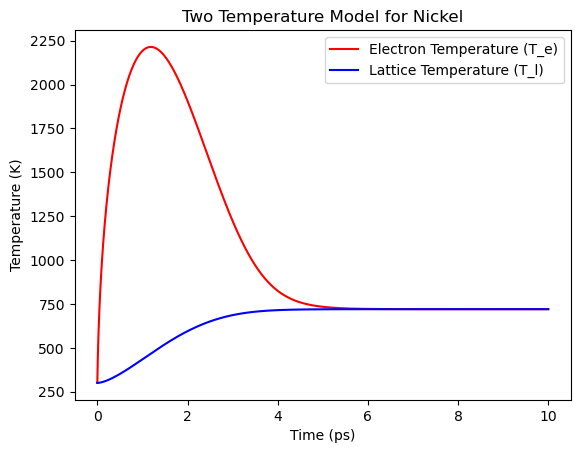

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants for Nickel (example values, adjust as needed)
C_e0 = 2.0e2  # J/m^3/K, electron heat capacity coefficient
C_l = 3.0e6   # J/m^3/K, lattice heat capacity
g = 3.0e17    # W/m^3/K, electron-phonon coupling constant

# Laser pulse parameters
I_0 = 1e20     # Peak intensity of the laser (W/m^3)
t_0 = 50e-15   # Pulse peak time (seconds)
pulse_width = 10e-13  # Pulse duration (FWHM in seconds)

# Initial conditions
T_e_initial = 300  # Initial electron temperature (K)
T_l_initial = 300  # Initial lattice temperature (K)
T_initial = [T_e_initial, T_l_initial]

# Time grid
time = np.linspace(0, 1e-11, 1000000)  # Time in seconds

# Define heat capacities as functions of T_e
def C_e(T_e):
    return C_e0 * T_e

# Define the laser pulse as a Gaussian function
def laser_pulse(t):
    return I_0 * np.exp(-((t - t_0)**2) / (2 * pulse_width**2))

# Define the system of differential equations
def two_temperature_model(T, t):
    T_e, T_l = T
    dT_e_dt = (-g * (T_e - T_l) + laser_pulse(t)) / C_e(T_e)  # Electron energy balance with laser pulse
    dT_l_dt = g * (T_e - T_l) / C_l                           # Lattice energy balance
    return [dT_e_dt, dT_l_dt]

# Solve the coupled system of ODEs
solution = odeint(two_temperature_model, T_initial, time)

# Extract the solutions for T_e and T_l
T_e_solution = solution[:, 0]
T_l_solution = solution[:, 1]

# Plot the results
plt.plot(time * 1e12, T_e_solution, label="Electron Temperature (T_e)", color="red")
plt.plot(time * 1e12, T_l_solution, label="Lattice Temperature (T_l)", color="blue")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.title("Two Temperature Model for Nickel with Gaussian Laser Pulse")
plt.show()


<h2> Nickel - Gold

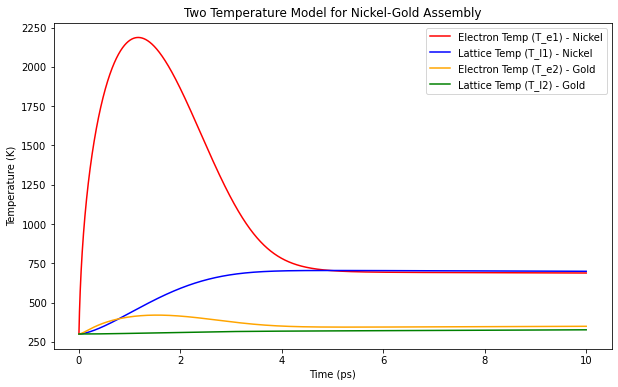

In [7]:
# Constants for Nickel (Layer 1) and Gold (Layer 2)
C_e1_0 = 2.0e2  # J/m^3/K, electron heat capacity for Nickel
C_e2_0 = 1.0e2  # J/m^3/K, electron heat capacity for Gold
C_l1 = 3.0e6    # J/m^3/K, lattice heat capacity for Nickel
C_l2 = 2.5e6    # J/m^3/K, lattice heat capacity for Gold
g1 = 3.0e17     # W/m^3/K, electron-phonon coupling constant for Nickel
g2 = 1.5e17     # W/m^3/K, electron-phonon coupling constant for Gold
G = 1.0e16      # W/m^2/K, electron-electron conductance between Nickel and Gold
K = 1.0e9       # W/m^2/K, lattice-lattice conductance between Nickel and Gold

# Laser pulse parameters
I_0 = 1e21      # Peak intensity of the laser (W/m^3)
t_0 = 50e-15    # Pulse peak time (seconds)
pulse_width = 10e-13  # Pulse duration (FWHM in seconds)

# Initial conditions
T_e1_initial = 300  # Initial electron temperature for Nickel (K)
T_l1_initial = 300  # Initial lattice temperature for Nickel (K)
T_e2_initial = 300  # Initial electron temperature for Gold (K)
T_l2_initial = 300  # Initial lattice temperature for Gold (K)
T_initial = [T_e1_initial, T_l1_initial, T_e2_initial, T_l2_initial]

# Time grid
time = np.linspace(0, 1e-11, 100000)  # Time in seconds

# Define heat capacities as functions of T_e for both layers
def C_e1(T_e1):
    return C_e1_0 * T_e1

def C_e2(T_e2):
    return C_e2_0 * T_e2

# Define the laser pulse as a Gaussian function
def laser_pulse(t):
    return I_0 * np.exp(-((t - t_0)**2) / (2 * pulse_width**2))

# Define the system of differential equations for the two-layer TTM
def two_layer_ttm(T, t):
    T_e1, T_l1, T_e2, T_l2 = T
    # Electron temperature equations
    dT_e1_dt = (-g1 * (T_e1 - T_l1) + laser_pulse(t) - G * (T_e1 - T_e2)) / C_e1(T_e1)
    dT_e2_dt = (-g2 * (T_e2 - T_l2) + G * (T_e1 - T_e2)) / C_e2(T_e2)
    
    # Lattice temperature equations
    dT_l1_dt = (g1 * (T_e1 - T_l1) - K * (T_l1 - T_l2)) / C_l1
    dT_l2_dt = (g2 * (T_e2 - T_l2) + K * (T_l1 - T_l2)) / C_l2
    
    return [dT_e1_dt, dT_l1_dt, dT_e2_dt, dT_l2_dt]

# Solve the coupled system of ODEs
solution = odeint(two_layer_ttm, T_initial, time)

# Extract the solutions for electron and lattice temperatures in both layers
T_e1_solution = solution[:, 0]
T_l1_solution = solution[:, 1]
T_e2_solution = solution[:, 2]
T_l2_solution = solution[:, 3]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time * 1e12, T_e1_solution, label="Electron Temp (T_e1) - Nickel", color="red")
plt.plot(time * 1e12, T_l1_solution, label="Lattice Temp (T_l1) - Nickel", color="blue")
plt.plot(time * 1e12, T_e2_solution, label="Electron Temp (T_e2) - Gold", color="orange")
plt.plot(time * 1e12, T_l2_solution, label="Lattice Temp (T_l2) - Gold", color="green")
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.title("Two Temperature Model for Nickel-Gold Assembly")
plt.show()
